<a href="https://colab.research.google.com/github/gustmdtmd/pythondemo/blob/main/python_24_%EC%83%81%EA%B6%8C%EB%B6%84%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('pdsample/seoul_20200630.csv', sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19964615,석봉토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,1121510300100770047020647,NaN,"서울특별시 광진구 자양로39길 20, (구의동)",143200,4992.0,NaN,1,NaN,127.088387,37.549245
1,19977290,피자마루,약수점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1114016200103720095000001,현진빌딩,"서울특별시 중구 동호로7길 37, (신당동)",100450,4596.0,NaN,1,NaN,127.010861,37.552153
2,19979960,홍능갈비,NaN,Q,음식,Q01,한식,Q01A02,갈비/삼겹살,I56111,...,1150010300110860003013118,NaN,"서울특별시 강서구 화곡로18길 31, (화곡동)",157010,7718.0,NaN,1,NaN,126.836078,37.538927
3,19983535,초밥왕,NaN,Q,음식,Q03,일식/수산물,Q03A03,음식점-초밥전문,I56113,...,1171010200100070028000237,현대타워아파트,"서울특별시 송파구 올림픽로 293-19, (신천동, 현대타워아파트)",138735,5510.0,NaN,1,NaN,127.102490,37.515149
4,19969945,에브리돈,북가좌점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1141011900103070003002306,NaN,"서울특별시 서대문구 응암로 65, (북가좌동)",120130,3681.0,NaN,1,NaN,126.910288,37.579029


In [ ]:
df.shape

(370321, 39)

In [ ]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
set(df['상권업종대분류명'])

{'관광/여가/오락', '부동산', '생활서비스', '소매', '숙박', '스포츠', '음식', '학문/교육'}

In [ ]:
print(set(df['상권업종중분류명']))

{'학원-어학', '종합소매점', '요가/단전/마사지', '연구소', '음식배달서비스', '사진/광학/정밀기기소매', '유아용품', '학원-음악미술무용', '음/식료품소매', '대중목욕탕/휴게', '연극/영화/극장', '학원-자격/국가고시', '무도/유흥/가무', '사진', '시계/귀금속소매', '종교용품판매', '캠프/별장/펜션', '스포츠/운동', '자동차/이륜차', '유아교육', '의약/의료품소매', '평가/개발/관리', '부페', '주유소/충전소', '학원-창업취업취미', '호텔/콘도', '커피점/카페', '주택수리', '학원-컴퓨터', '학원-예능취미체육', '패스트푸드', '유스호스텔', '기타교육기관', '운송/배달/택배', '건강/미용식품', '장례/묘지', '부동산관련서비스', '법무세무회계', '부동산중개', '예식/의례/관혼상제', '부동산임대', '닭/오리요리', '별식/퓨전요리', '놀이/여가/취미', '학원-보습교습입시', '제과제빵떡케익', '경마/경륜/성인오락', '광고/인쇄', '사무/문구/컴퓨터', '실외운동시설', '개인/가정용품수리', '실내운동시설', '학문교육기타', '운동/경기용품소매', '일식/수산물', '세탁/가사서비스', '분식', '한식', '가방/신발/액세서리', '선물/팬시/기념품', '자동차/자동차용품', '예술품/골동품/수석/분재', '대행업', '물품기기대여', '학교', '전시/관람', '분양', '취미/오락관련소매', '기타서비스업', '중식', '화장품소매', '가정/주방/인테리어', '애견/애완/동물', 'PC/오락/당구/볼링등', '모텔/여관/여인숙', '가구소매', '책/서적/도서', '양식', '철물/난방/건설자재소매', '이/미용/건강', '인력/고용/용역알선', '유흥주점', '페인트/유리제품소매', '기타음식업', '개인서비스', '중고품소매/교환', '민박/하숙', '의복의류', '가전제품소매', '도서관/독서실', '기타판매업', '학원기타', '행사/이벤트', '운영관리시설'}


In [ ]:
print(set(df['상권업종소분류명']))

{nan, '활기원', '정육점', '타이어판매', '학원-가요', '학원-복장', '그림/액자판매', '회갑연서비스', '동물약품판매', '꽃꽂이(대행)', '커피전문점/카페/다방', '수입담배판매', '장식품대여', '구판장/직판장', '학원-목공예', '독서실', '학원-레크리에이션', '상가분양', '악기대여', '볼링용품판매', '학원-양재', '카오디오전문', '서바이벌게임장', '오리고기전문', '아케이드/쇼핑센타', '철물/건설자재소매', '표구점', '가구수리', '닭내장/닭발요리', '캠프/별장/펜션', '자동판매기운영', '토산품/기념품점', '스파게티전문점', '제과점', '조립식앵글판매', '학원-역학', '가구판매-돌침대', '국/찌개배달', '학원-속기', '학원-도배', '피아노조율', '학원-네일아트', '스키장비판매', '욕탕업-종합', '복전문', '디스플레이대행', '부동산소유권조사', '출장파티/연회대행', '이동도서관운영', '호텔/콘도', '패션디자인', '화물운송-용달', '할인점', '학원-사진', '재활용/고물수집', '학원/국가고시', '일반가구소매', '학원-관광통역', '갈비/삼겹살', '비만/피부관리', '주택수리종합', '전자오락실', '카메라판매', '진열장판매', '피아노/바이올린/기타', '학원-마술', '농자재판매', '심부름센터', '닭갈비전문', '추어탕전문', '이벤트용품판매', '혼수전문점', '빠/카페/스탠드빠', '자동차정비/카센타', '아구전문', '철판구이요리전문', '학원-칵테일', '과학관/전시관', '건강/헬스용품', '자동차부품판매', '가구판매-사무용가구', '경보기판매', '용달/개별화물', '학원-무용', '두부요리전문', '골동품판매', '휴게텔', '음악감상', '가구판매-등가구', '사진/원고/기록물대여', '고속도로휴게소', '토스트전문', '학원(종합)', '가스레인지판매', '유리창호', '전자오락기구판매', '사료소매', '가정용연료소매', '기타운영설비', 

In [ ]:
# 결측지
# 각 column의 null의 개수 출력
df.isnull().sum()

상가업소번호            0
상호명               0
지점명          315822
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명         12
표준산업분류코드      25266
표준산업분류명       25266
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              1
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         70637
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        325767
건물관리번호            0
건물명          191777
도로명주소             0
구우편번호             0
신우편번호             2
동정보          341396
층정보          120053
호정보          314429
경도                0
위도                0
dtype: int64

In [ ]:
# missingno가 지원이 되지 않는다면 설치하면 된다.
# !pip install missingno

In [ ]:
#  결측지를 그래프로 확인
import missingno as msno

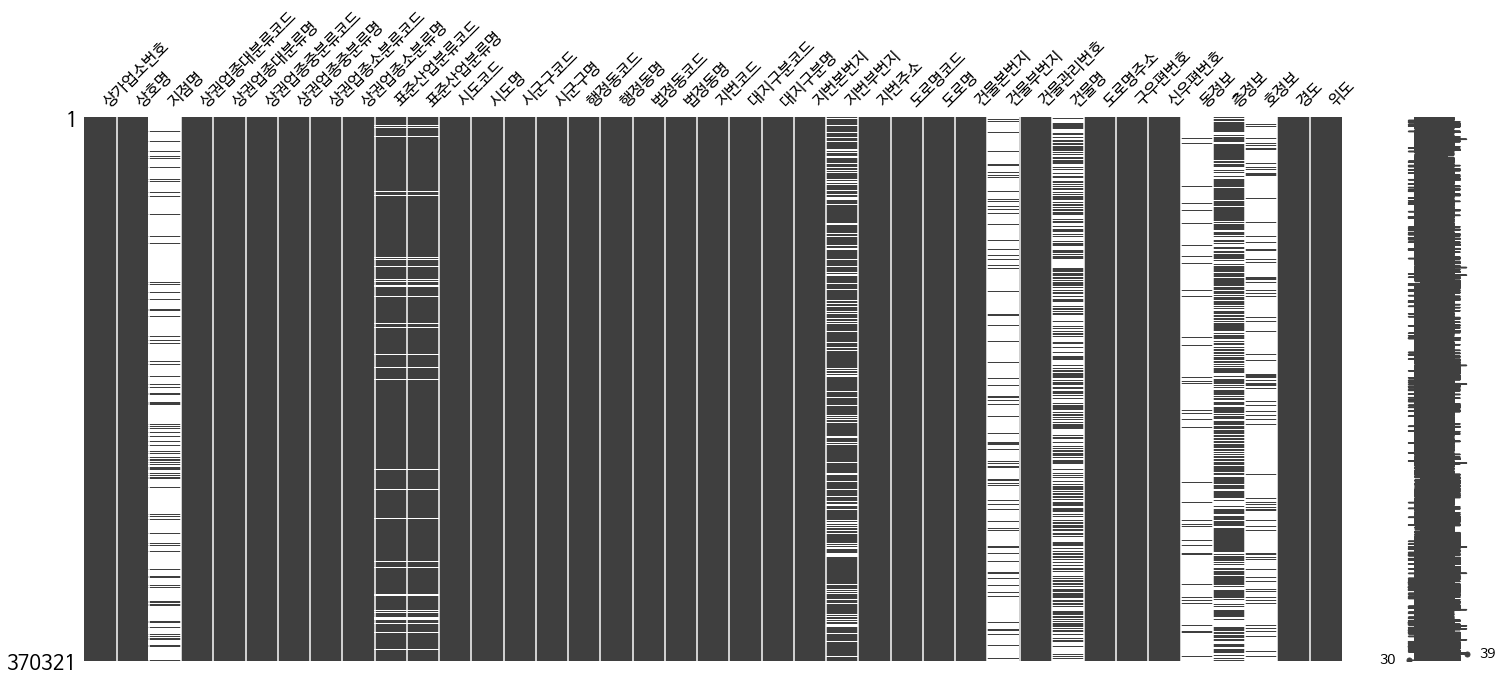

In [ ]:
msno.matrix(df)

In [ ]:
df['상권업종대분류명'].value_counts()

음식          124001
소매          123003
생활서비스        64529
학문/교육        29985
부동산          14975
관광/여가/오락     10454
숙박            2971
스포츠            403
Name: 상권업종대분류명, dtype: int64

In [ ]:
df['상권업종중분류명'].value_counts()

한식          38703
이/미용/건강     31717
종합소매점       25716
의복의류        23307
커피점/카페      18220
            ...  
전시/관람          14
부동산관련서비스        4
기타교육기관          4
연구소             3
학교              1
Name: 상권업종중분류명, Length: 94, dtype: int64

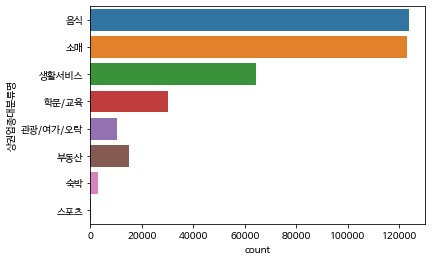

In [ ]:
sns.countplot(data=df, y='상권업종대분류명')

In [ ]:
df_food = df.loc[df['상권업종대분류명']=='음식' ]

In [ ]:
df_food.shape

(124001, 39)

### 스타벅스와 이디야

In [ ]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
dataset = df[['상호명', '지점명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '도로명', '경도', '위도']]
dataset.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
0,석봉토스트,NaN,패스트푸드,서울특별시,광진구,구의2동,서울특별시 광진구 자양로39길,127.088387,37.549245
1,피자마루,약수점,패스트푸드,서울특별시,중구,약수동,서울특별시 중구 동호로7길,127.010861,37.552153
2,홍능갈비,NaN,한식,서울특별시,강서구,화곡1동,서울특별시 강서구 화곡로18길,126.836078,37.538927
3,초밥왕,NaN,일식/수산물,서울특별시,송파구,잠실6동,서울특별시 송파구 올림픽로,127.102490,37.515149
4,에브리돈,북가좌점,한식,서울특별시,서대문구,북가좌2동,서울특별시 서대문구 응암로,126.910288,37.579029


In [ ]:
dataset.sample(10)

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
280660,즉석떡볶이,NaN,분식,서울특별시,중랑구,상봉2동,서울특별시 중랑구 망우로,127.076510,37.593737
38580,런앤룩이태원비점,NaN,의복의류,서울특별시,용산구,이태원1동,서울특별시 용산구 이태원로,126.991373,37.534526
94854,박지민헤어,NaN,이/미용/건강,서울특별시,중랑구,중화1동,서울특별시 중랑구 봉화산로,127.080794,37.601744
277098,대명유통,NaN,종합소매점,서울특별시,종로구,창신1동,서울특별시 종로구 종로44길,127.011367,37.570440
307449,엔제리너스커피구로디,NaN,커피점/카페,서울특별시,구로구,구로3동,서울특별시 구로구 디지털로34길,126.898205,37.485461
315117,할리스,개화산점,커피점/카페,서울특별시,양천구,목2동,서울특별시 양천구 목동중앙북로18길,126.874525,37.545094
142320,콩깍지카페,NaN,커피점/카페,서울특별시,광진구,군자동,서울특별시 광진구 군자로,127.075442,37.554650
124563,연세ELP음악학원,NaN,학원기타,서울특별시,노원구,중계1동,서울특별시 노원구 덕릉로77길,127.073490,37.654623
57401,소래포구,NaN,음/식료품소매,서울특별시,은평구,응암3동,서울특별시 은평구 응암로12길,126.918041,37.588561
87277,열창노래방,NaN,무도/유흥/가무,서울특별시,성동구,행당1동,서울특별시 성동구 왕십리로21다길,127.033196,37.559646


In [ ]:
df_coffee = dataset[dataset['상권업종중분류명']=='커피점/카페']
df_coffee.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
9,왕실,NaN,커피점/카페,서울특별시,중구,명동,서울특별시 중구 남대문로,126.982419,37.562274
13,커피빈,코리아교대점,커피점/카페,서울특별시,서초구,서초1동,서울특별시 서초구 서초중앙로,127.014217,37.492388
15,고려대학교교육관쎄리오점,NaN,커피점/카페,서울특별시,성북구,안암동,서울특별시 성북구 안암로,127.031702,37.588485
18,스완카페트,NaN,커피점/카페,서울특별시,영등포구,대림3동,서울특별시 영등포구 도신로10가길,126.897710,37.503693
26,커피빈코리아선릉로93길점,코리아선릉로93길점,커피점/카페,서울특별시,강남구,역삼1동,서울특별시 강남구 선릉로93길,127.047883,37.505675


In [ ]:
df_coffee.columns

Index(['상호명', '지점명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '도로명', '경도', '위도'], dtype='object')

In [ ]:
print(df_coffee['상호명'].unique().shape)

(12426,)


In [ ]:
df_coffee['상호명'].value_counts()

간단하지만특별한화피디Cafe    1198
이디야커피               338
스타벅스                303
커피빈                 146
투썸플레이스              119
                   ... 
허니비와플까페               1
토즈신촌15센터              1
탑커피숍                  1
행복다방                  1
밀스톤                   1
Name: 상호명, Length: 12426, dtype: int64

In [ ]:
print(set(df_coffee['상호명'].unique()))

{'삼각카페', '곳간', '떡카페미소재', '스타벅스마포이마트점', '밀알카페', '질리', '카페이퍼스', '달콤커피논현점', '위드모리Withmorrie', '애프터유', '엘보르다도', '커피빈코리아CBTL잠실홈플러스점', '카페수에르떼', 'EDEN', '동', '미인단팥빵', '9카페', '아이스프링커피', '동병상련', '석굴암다방', 'PICTURESTAY', '동아다방', '탐앤탐스트래블', '바까날레커피전문점', '커피미', '카페26', '플리즈커피', '다같이카페', '에트리움카페', '커피베네', '공차현대천호점팝업스토어', '브레들리', '호원당', '빙빙', '약다방봄동', '투썸플레이스', '카페데뮤지까', '카페라루라루', '빅밤', '환다방', '산토리니커피', '카페루치아', '익동다방', '카페위드', '스타벅스상암DMC센트럴몰점', 'siscoffee', '겟잇커피', 'Perhaps', '메쉬커피', '성유엔터프라이즈', '울디', '미스터힐링명동인터네셔널점', '자바시티커피', '스튜디오27', 'CNNTHEBIZ', '커피넘버2COFFEENo.2', 'Tobean', '커피만역점', '가재울지혜마루', '스타벅스화곡DT점', '아삽', '쥬스킹', '커피랑파이랑', '반머이', '에이치이에이', '지에스25건대시티', '선길', '푸디스트카페퀸즈아모르', '그리고카페', '빽다방방화사거리점', '티테라피행랑', '트립커피', '보드카페오즈', '본전', '방초', '디초콜렛커피앤드', '쥬씨문정엠스테이트점', '에비뉴', '카페봉봉', '해머스미스로스터리', '커피니양재점', '조이스', '안녕강아지와고양이', '블링블링', '카페골목', '사뜨바', '공감', '카페베네', '을지사거리이디야커피숍', '백죠다방', '카페카리스&베이비카페', '안다즈커피', '삼양푸드다이닝까페믹스엔', '카페포엠', '스테이블커피로스터스', '더카페서울산업대점', '카페네스', 'N카페보라매점', '놀숲강남역점', '승룡이네집', '

In [ ]:
df_coffee.loc[df_coffee['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'상호명'].shape

(506,)

In [ ]:
df_coffee.loc[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA'),'상호명'].shape

(432,)

In [ ]:
df_coffee.loc[df_coffee['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'상호명'].unique()

array(['스타벅스', '스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스가락시장역점', '스타벅스외대점', '스타벅스연신내역',
       '스타벅스연세백양로점', '스타벅스석촌역', '스타벅스연대동문', '스타벅스명지대점', '스타벅스압구정로데오역',
       '스타벅스신림점', '스타벅스사당점', '스타벅스강남삼성타운점', '스타벅스서울대입구역점', '스타벅스명동미래',
       '스타벅스건국클래식점', '스타벅스신촌명물거리점', '스타벅스광장점', '스타벅스커피여의도호성',
       '스타벅스올림픽공원북문점', '스타벅스삼선교점', '스타벅스연희DT점', '스타벅스충정타워', '스타벅스종각점',
       '스타벅스이수역점', '스타벅스방배카페입구', '스타벅스W-MALL점', '스타벅스마포일진빌딩점',
       '스타벅스천호로데오점', '스타벅스용산역점', '스타벅스중계역점', '스타벅스명동메트로', '스타벅스마포아크로타워점',
       '스타벅스중랑구청점', '스타벅스남부터미널2점', '스타벅스구로디지털로점', '스타벅스종로관수점', '스타벅스논현힐탑',
       '스타벅스삼성도심공항점', '스타벅스선정릉역점', '스타벅스종로2가점', '스타벅스미아역점', '스타벅스선릉로점',
       '스타벅스명동역', '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점',
       '스타벅스구로에이스트윈타워1점', '스타벅스교대역점', '스타벅스을지로입구', '스타벅스서울중앙우체국점',
       '스타벅스명일이마트점', '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스구로하이엔드점', '스타벅스삼성교점',
       '스타벅스남산스테이트', '스타벅스서울교대점', '스타벅스커리학동사거리점', '스타벅스강북구청사거리점',
       '스타벅스방이역점', '스타벅스청

In [ ]:
df_coffee.loc[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA'),'상호명'].unique()

array(['이디야커피', '이디야IBK고객센터', '이디야서대문점2호', 'EDIYA커피', '이디야커피전농뉴타운점',
       '이디야커피자양동점', '이디야커피은행나무사거리점', '이디야커피마포KCC점', '이디야커피천호현대점',
       '이디야커피연구소', '이디야커피동소문동점', '이디야커피전문점', '이디야커피세광교회점', '이디야마들역',
       '이디야커피봉천역점', '이디야커피신도림테크노마트', '이디야커피점', '이디야역삼플래티넘', '이디야커피망우점',
       'EDIYACOFFEE', '부일이디야커피', 'EDIYACOFFEESHOP', '이디야에스프레소',
       '이디야커피경희대점', '이디야커피청계천점', '이디야커피애오개역점', '이디야커피자양사거리점', '이디야커피용두점',
       '이디야커피낙원동점', '이디야커피양재AT점', '이디야커피강남역지하상가점', '이디야커피봉천중앙점',
       '이디야커피가든파이브', '이디야카페', '이디야커피신림중앙점', '이디야커피수유역점', '이디야커피약수점',
       '이디야커피을지로역점', '이디야커피김안과점', '이디야커피한성대역점2층', '이디야커피삼성봉은사로점',
       'EDIYA카페', 'ediyacoffee', '이디야커피정릉아리랑점', '이디야커피한국수출입은행점',
       '이디야커피디지털미디어시티역사점', '이디야커피일원동점', '이디야커피신금호역점', '이디야커피영등포본동점',
       '이디야커피광산사거리점', '이디야커피신길썬프라자점', '이디야커피도봉산역사점', '이디야커피신당중앙점',
       '이디야커피중곡대원점', '이디야커피논골사거리점', '이디야커피개봉북부점', '이디야커피돈암아리랑점',
       '이디야커피사당역점', '이디야커피텐즈힐점', '이디야커피마곡역점', '이디야커피마곡엠밸리점',
       '이디야커피신림문화교점', '이디야커피창신중앙점', '이디야커피한강공원로점', '이디야커피등촌

In [ ]:
# 스타벅스 데이터 뽑아온다.
df_seoul_starbucks = df_coffee.loc[df_coffee['상호명'].str.contains('스타벅스|starbucks|STARBUCKS')]
df_seoul_starbucks.shape

(506, 9)

In [ ]:
df_seoul_starbucks.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
752,스타벅스,이태원점,커피점/카페,서울특별시,용산구,이태원1동,서울특별시 용산구 이태원로,126.994781,37.534303
1406,스타벅스종로3가점,종로3가점,커피점/카페,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 종로,126.990207,37.570585
1875,스타벅스,신사2점,커피점/카페,서울특별시,서초구,잠원동,서울특별시 서초구 강남대로,127.019763,37.513663
9952,스타벅스커피여의도IFC1F,NaN,커피점/카페,서울특별시,영등포구,여의동,서울특별시 영등포구 국제금융로,126.924863,37.525172
9957,스타벅스,삼성역점,커피점/카페,서울특별시,강남구,삼성1동,서울특별시 강남구 테헤란로103길,127.063878,37.510038


In [ ]:
# 이디야 데이터를 뽑아온다.
df_seoul_ediya = df_coffee.loc[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA')]
df_seoul_ediya.shape

(432, 9)

In [ ]:
df_seoul_ediya.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
1153,이디야커피,신길역점,커피점/카페,서울특별시,영등포구,신길1동,서울특별시 영등포구 영등포로,126.918062,37.515118
1981,이디야커피,이마트구로점,커피점/카페,서울특별시,구로구,구로3동,서울특별시 구로구 디지털로32길,126.897870,37.484385
5352,이디야커피,중계롯데우성점,커피점/카페,서울특별시,노원구,중계1동,서울특별시 노원구 노원로22길,127.072754,37.646364
9359,이디야커피,금호역점,커피점/카페,서울특별시,성동구,금호2.3가동,서울특별시 성동구 장터길,127.017791,37.548427
10176,이디야커피,NaN,커피점/카페,서울특별시,강남구,대치2동,서울특별시 강남구 테헤란로104길,127.064790,37.508585


In [ ]:
# 스타벅스와 이디야 데이터 뽑아오기
df_seoul_star_edi = df_coffee.loc[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA|스타벅스|starbucks|STARBUCKS')].copy()
df_seoul_star_edi.shape

(938, 9)

In [ ]:
df_seoul_star_edi.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
752,스타벅스,이태원점,커피점/카페,서울특별시,용산구,이태원1동,서울특별시 용산구 이태원로,126.994781,37.534303
1153,이디야커피,신길역점,커피점/카페,서울특별시,영등포구,신길1동,서울특별시 영등포구 영등포로,126.918062,37.515118
1406,스타벅스종로3가점,종로3가점,커피점/카페,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 종로,126.990207,37.570585
1875,스타벅스,신사2점,커피점/카페,서울특별시,서초구,잠원동,서울특별시 서초구 강남대로,127.019763,37.513663
1981,이디야커피,이마트구로점,커피점/카페,서울특별시,구로구,구로3동,서울특별시 구로구 디지털로32길,126.897870,37.484385


In [ ]:
df_seoul_star_edi.loc[df_seoul_star_edi['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명']='스타벅스'

In [ ]:
df_seoul_star_edi.loc[df_seoul_star_edi['상호명'].str.contains('이디야|ediya|EDIYA'), '브랜드명']='이디야'

In [ ]:
df_seoul_star_edi.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도,브랜드명
752,스타벅스,이태원점,커피점/카페,서울특별시,용산구,이태원1동,서울특별시 용산구 이태원로,126.994781,37.534303,스타벅스
1153,이디야커피,신길역점,커피점/카페,서울특별시,영등포구,신길1동,서울특별시 영등포구 영등포로,126.918062,37.515118,이디야
1406,스타벅스종로3가점,종로3가점,커피점/카페,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 종로,126.990207,37.570585,스타벅스
1875,스타벅스,신사2점,커피점/카페,서울특별시,서초구,잠원동,서울특별시 서초구 강남대로,127.019763,37.513663,스타벅스
1981,이디야커피,이마트구로점,커피점/카페,서울특별시,구로구,구로3동,서울특별시 구로구 디지털로32길,126.897870,37.484385,이디야


In [ ]:
df_seoul_star_edi['브랜드명'].value_counts()

스타벅스    506
이디야     432
Name: 브랜드명, dtype: int64

In [ ]:
geo_df_coffee = df_seoul_star_edi

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

In [ ]:
# folium tiles 종류 구글 검색
# tiles 배경지도 변경하기
#map = folium.Map(location=[geo_df_coffee['위도'].mean(), geo_df_coffee['경도'].mean()], zoom_start=12)
map = folium.Map(location=[geo_df_coffee['위도'].mean(), geo_df_coffee['경도'].mean()], zoom_start=12, tiles='Stamen Toner')
#map = folium.Map(location=[geo_df_coffee['위도'].mean(), geo_df_coffee['경도'].mean()], zoom_start=12, tiles='cartodb positron')

for n in geo_df_coffee.index:
  # 팝업에 들어갈 텍스트를 지정해준다.
  popup_name = geo_df_coffee.loc[n, '상호명'] + ' - ' + geo_df_coffee.loc[n, '도로명']
  # 브랜드명에 따라 아이콘 색상을 다르게 준다.
  if geo_df_coffee.loc[n, '브랜드명'] == '스타벅스':
    icon_color = 'green'
  else:
    icon_color = 'blue'

  folium.CircleMarker(location=[geo_df_coffee.loc[n, '위도'], geo_df_coffee.loc[n, '경도']],
                                radius = 3,
                                popup = popup_name,
                                color = icon_color,
                                fill = True,
                                fill_color = icon_color).add_to(map)
# fill 옵션은 비어있는 부분을 NA로 채울지 여부를 결정합니다. 
# 디폴트 FALSE인데, 비어있는 부분을 채우지 않고 오류를 반환합니다. TRUE로 설정해야 NA로 채워줍니다. 

In [ ]:
#map

In [ ]:
map.save('./pdsample/df_coffee.html')

In [ ]:
### 서울시 구 별 스타벅스, 이디야 수
df_coffee_brand = pd.DataFrame(df_seoul_star_edi.groupby(['시군구명', '브랜드명'])['상호명'].count().reset_index())
df_coffee_brand.columns = ['구','브랜드명', '매장수']
df_coffee_brand.head()

,구,브랜드명,매장수
0,강남구,스타벅스,85
1,강남구,이디야,40
2,강동구,스타벅스,12
3,강동구,이디야,10
4,강북구,스타벅스,5


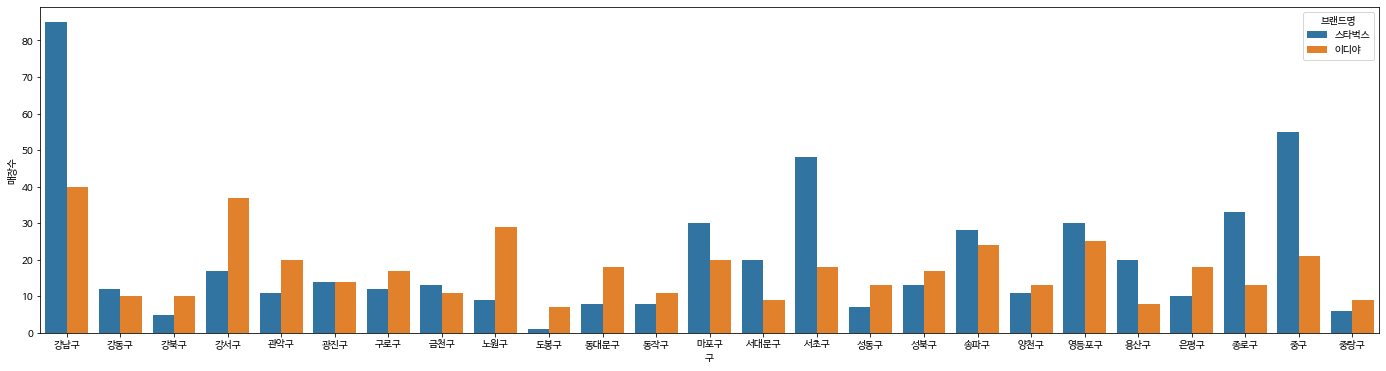

In [ ]:
plt.figure(figsize=(24,6))
sns.barplot(data=df_coffee_brand, x='구', y='매장수', hue='브랜드명')

In [ ]:
df_seoul_star_edi.groupby(['시군구명'])['상호명'].count().head()

시군구명
강남구    125
강동구     22
강북구     15
강서구     54
관악구     31
Name: 상호명, dtype: int64

In [ ]:
df_seoul_star_edi_gu = pd.DataFrame(df_seoul_star_edi.groupby(['시군구명'])['상호명'].count())

In [ ]:
import json

In [ ]:
# https://github.com/southkorea/southkorea-maps

geo_path = 'pdsample/skorea-municipalities-2018-geo.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
geo_df_coffee.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도,브랜드명
752,스타벅스,이태원점,커피점/카페,서울특별시,용산구,이태원1동,서울특별시 용산구 이태원로,126.994781,37.534303,스타벅스
1153,이디야커피,신길역점,커피점/카페,서울특별시,영등포구,신길1동,서울특별시 영등포구 영등포로,126.918062,37.515118,이디야
1406,스타벅스종로3가점,종로3가점,커피점/카페,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 종로,126.990207,37.570585,스타벅스
1875,스타벅스,신사2점,커피점/카페,서울특별시,서초구,잠원동,서울특별시 서초구 강남대로,127.019763,37.513663,스타벅스
1981,이디야커피,이마트구로점,커피점/카페,서울특별시,구로구,구로3동,서울특별시 구로구 디지털로32길,126.897870,37.484385,이디야


In [ ]:
#map = folium.Map(location=[geo_df_coffee['위도'].mean(), geo_df_coffee['경도'].mean()], zoom_start=12)
map = folium.Map(location=[geo_df_coffee['위도'].mean(), geo_df_coffee['경도'].mean()], zoom_start=12, tiles='Stamen Toner')
#map = folium.Map(location=[geo_df_coffee['위도'].mean(), geo_df_coffee['경도'].mean()], zoom_start=12, tiles='cartodb positron')

# 단계 구분도(Choropleth Map)
map.choropleth(geo_data = geo_json,
               data = df_seoul_star_edi_gu['상호명'],
               columns = [df_coffee_brand.index, df_seoul_star_edi_gu['상호명']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity = 0.7,
               line_opacity = 0.2,
               highlight = True)

for n in geo_df_coffee.index:
  # 팝업에 들어갈 텍스트를 지정해준다.
  popup_name = geo_df_coffee.loc[n, '상호명'] + ' - ' + geo_df_coffee.loc[n, '도로명']
  # 브랜드명에 따라 아이콘 색상을 다르게 준다.
  if geo_df_coffee.loc[n, '브랜드명'] == '스타벅스':
    icon_color = 'green'
  else:
    icon_color = 'blue'

  folium.CircleMarker(location=[geo_df_coffee.loc[n, '위도'], geo_df_coffee.loc[n, '경도']],
                                radius = 3,
                                popup = popup_name,
                                color = icon_color,
                                fill = True,
                                fill_color = icon_color).add_to(map)

/usr/local/lib/python3.8/dist-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
#map